In [1]:
import pandas as pd
import numpy as np
import os
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline  

In [2]:
# 画图函数
def plot_line(dataframe_,columns_=['je'],legend_=['金额'],title_=''):
    df_tmp = dataframe_.copy()
    '''
    dataframe_ : pandas的dataframe
    columns_   : 需要画图的列，list格式
    legend_    : 需要画图的列明，即图例，list格式
    title_     ：图的名称，保存在本地需要此命名
    '''
    # 背景
    #fig=plt.figure(figsize=(6.4,4.8), dpi=100)  # 多图
    #ax = fig.add_subplot(111) # mnx，m行n列第x个
    fig,ax=plt.subplots(figsize=(6.4,4.8), dpi=100)
    # x轴
    # xlab = pd.to_datetime(list(map(str,df_tmp.index)))    
    xlab = range(df_tmp.shape[0])
    # x轴旋转
    #plt.xticks(rotation=320)
    marker_ = [',','*','.','+','x',]
    linestyle_ = ['-','-.']
    # 画线
    for i,j in enumerate(columns_):
        ax.plot(xlab,df_tmp[j],linestyle=linestyle_[i],marker=marker_[0],markersize='5',label=legend_[i]) # lw=3,marker='.'
    # 标题
    plt.title(title_,fontsize=10)
    plt.tick_params(labelsize=10,axis='both')  # 刻度的大小
    #plt.legend(prop={'size':15},loc='best')  # 图例
    plt.legend(prop={'size':15},loc='upper left')  # 图例
    #显示网格
    ax.grid(True, linestyle='-.')
    #ax.yaxis.grid(True, linestyle='-.')
    plt.margins(0,0)
    fig.savefig(f'{title_}.png',bbox_inches = 'tight')
    plt.show()

In [3]:
# 绝对路径
data_path = '...\附件-数据分析题03_销售数据分析'
# 相对路径
# data_path = os.getcwd()

#### 读取四个表的原始数据

In [4]:
# 表1
file_name = '附件1-会员信息表.csv'
file_name = os.path.join(data_path,file_name)
with open(file_name,'r',encoding='utf-8') as f:
    raw_data_vip_info = pd.read_csv(f)
# raw_data_vip_info.describe()
# 表2
file_name = '附件2-销售流水表.csv'
file_name = os.path.join(data_path,file_name)
with open(file_name,'r',encoding='utf-8') as f:
    raw_data_sale_flow = pd.read_csv(f)
# 表3
file_name = '附件3-会员消费明细表.csv'
file_name = os.path.join(data_path,file_name)
with open(file_name,'r',encoding='gbk') as f:
    raw_data_sale_detail_vip = pd.read_csv(f)
# 表4
file_name = '附件4-商品信息表.csv'
file_name = os.path.join(data_path,file_name)
with open(file_name,'r',encoding='gbk') as f:
    raw_data_good_info = pd.read_csv(f)

#### 生成数据统计报告并输出(运行需要一段时间，近10min)

In [ ]:
# 生成数据统计报告
data_report1 = pdp.ProfileReport(raw_data_good_info)
data_report2 = pdp.ProfileReport(raw_data_sale_flow)
data_report3 = pdp.ProfileReport(raw_data_sale_detail_vip)
data_report4 = pdp.ProfileReport(raw_data_good_info)
# 输出报告到相对路径
data_report1.to_file(os.path.join(data_path,'data_report1.html'))
data_report2.to_file(os.path.join(data_path,'data_report2.html'))
data_report3.to_file(os.path.join(data_path,'data_report3.html'))
data_report4.to_file(os.path.join(data_path,'data_report4.html'))

## 解答问题

### 问题1：请通过文字分析4张表的字段信息，指出可以得到哪些直接，间接的信息

答：  
1.1 根据四个表的字段信息，可以直接得出的信息是：  
- 表一可得出本店注册会员的年龄比例，性别比例；  
- 表二可得出近几年该店的销售量与销售收入在时间序列上的趋势，以及本店各商品的受欢迎程度；  
- 表三可得出会员的消费习惯，包括消费时间，重复购买的商品，单次购买量与购买额；  
- 表四可得出该店销售商品的真实利润。    

1.2 通过结合4个表的信息，可以间接得出：  

- 本店会员，他店会员，非会员的行为模式差别，比如购买产品类别的习惯，购买时间的差异，单次购买额的差异；  
- 对比人均消费收入与消费利润的时间序列趋势与周期；  
- 通过统计商品的销售量优化存货机制；  
- 通过消费者消费的时间周期和趋势进行淡季促销及宣传；  
- 通过统计退货情况，发现退货集中在哪些商品、哪些会员以及哪些时间，寻找规律，进而降低退货率；  
- 统计赠品对会员消费情况的影响、退货对会员消费情况的影响。

### 问题2：统计该商场的总销售额，以及按年度，月度统计销售额。分析销售额的变化是否有周期性。

In [5]:
# 使用表二的数据
raw_data_sale_flow_tmp = raw_data_sale_flow.copy()[['dtime','je']]
# 将时间列转为时间格式
raw_data_sale_flow_tmp['dtime'] = pd.to_datetime(raw_data_sale_flow_tmp['dtime'],format='%Y/%m/%d %H:%M',errors='coerce') # format指示原始数据的格式，error将非时间转化为nat
# 将时间作为索引
raw_data_sale_flow_tmp = raw_data_sale_flow_tmp.set_index('dtime')
# 求总销售额
total_je = (raw_data_sale_flow_tmp.sum().values/10000).round(4)[0]
print(f'商店总销售额为：{total_je}万元')
# 求月度销售额
raw_data_sale_flow_je_m = raw_data_sale_flow_tmp.resample('M').sum()
raw_data_sale_flow_je_m['je'] = (raw_data_sale_flow_je_m['je'].values/10000).round(4)
# 求季度销售额
raw_data_sale_flow_je_q = raw_data_sale_flow_tmp.resample('Q').sum()
raw_data_sale_flow_je_q['je'] = (raw_data_sale_flow_je_q['je'].values/10000).round(4)
# 求自然月的销售总额
raw_data_sale_flow_je_m_sum = raw_data_sale_flow_je_m.copy()
raw_data_sale_flow_je_m_sum['dtime'] = raw_data_sale_flow_je_m_sum.index
raw_data_sale_flow_je_m_sum['year'] = raw_data_sale_flow_je_m_sum['dtime'].dt.year
raw_data_sale_flow_je_m_sum['month'] = raw_data_sale_flow_je_m_sum['dtime'].dt.month
raw_data_sale_flow_je_m_sum.set_index('dtime',inplace=True)
raw_data_sale_flow_je_m_sum = raw_data_sale_flow_je_m_sum.groupby(['month']).sum()['je'].to_frame()
# 求自然月的销售均额
raw_data_sale_flow_je_m_mean = raw_data_sale_flow_je_m.copy()
raw_data_sale_flow_je_m_mean['dtime'] = raw_data_sale_flow_je_m_mean.index
raw_data_sale_flow_je_m_mean['year'] = raw_data_sale_flow_je_m_mean['dtime'].dt.year
raw_data_sale_flow_je_m_mean['month'] = raw_data_sale_flow_je_m_mean['dtime'].dt.month
raw_data_sale_flow_je_m_mean.set_index('dtime',inplace=True)
raw_data_sale_flow_je_m_mean = raw_data_sale_flow_je_m_mean.groupby(['month']).mean()['je'].to_frame()
# 求年度销售额
raw_data_sale_flow_je_y = raw_data_sale_flow_tmp.resample('Y').sum()
raw_data_sale_flow_je_y['je'] = (raw_data_sale_flow_je_y['je'].values/10000).round(4)
print(f'2016销售额为：{raw_data_sale_flow_je_y.iloc[0,:].values[0]}万元')
print(f'2016销售额为：{raw_data_sale_flow_je_y.iloc[1,:].values[0]}万元')

商店总销售额为：130411.2721万元
2016销售额为：72880.181万元
2016销售额为：57531.0911万元


plt.style.use("ggplot")

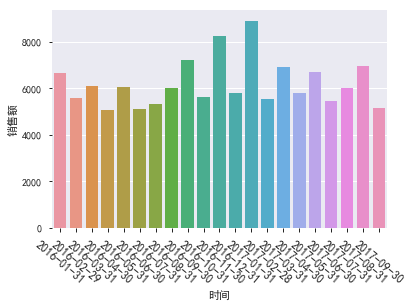

In [6]:
# 画时间序列上的月度直方图
xlab = list(map(str,raw_data_sale_flow_je_m.index.values))
xlab = [i[:10] for i in xlab]
sns.barplot(x=xlab,y=raw_data_sale_flow_je_m['je'].values)
#plt.bar(x=xlab,height=raw_data_sale_flow_je_m['je'].values,color='rgb')
plt.ylabel('销售额')# fontsize
plt.xlabel('时间')
plt.title('')
plt.xticks(rotation=320,fontsize=12)  # x周字体旋转
plt.show()

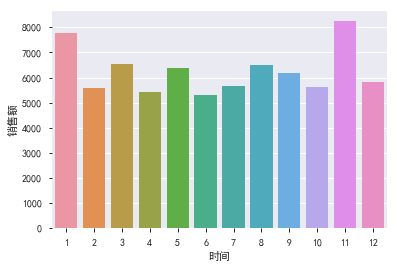

In [7]:
# 将两年的数据按自然月分组画直方图
#sns.set_style('whitegrid') 
sns.barplot(x=raw_data_sale_flow_je_m_mean.index.values,y=raw_data_sale_flow_je_m_mean['je'].values)
#plt.bar(x=raw_data_sale_flow_je_m_mean.index.values,height=raw_data_sale_flow_je_m_mean['je'].values,color='rgb')
plt.ylabel('销售额')# fontsize
plt.xlabel('时间')
plt.title('')
plt.show()

答： 从上图可以看出，销售额有明显的规律:
1. 销售额前6的月份为11,1,3,8,5,9；
- 11月由于双十一的原因是12个月中销售额最高的月份，超过其他月份均额的近30%；
- 1月份由于春节的原因略低于11月；
- 3月份由于换季，农历新年后密集开班，销售额明显高于2月份和4月份；
- 5月份由于五一小长假促销活动再次出现小高潮；
- 8月份与9月份是暑期与开学季，人们购物的时间比6、7月份增加，家长学生置办开学用品

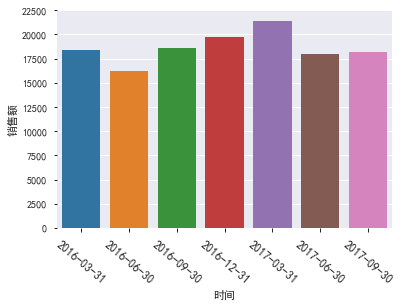

In [8]:
# 画季度直方图
xlab = list(map(str,raw_data_sale_flow_je_q.index.values))
xlab = [i[:10] for i in xlab]
sns.barplot(x=xlab,y=raw_data_sale_flow_je_q['je'].values)
#plt.bar(x=xlab,height=raw_data_sale_flow_je_q['je'].values,color='rgb')
plt.ylabel('销售额')# fontsize
plt.xlabel('时间')
plt.title('')
plt.xticks(rotation=320,fontsize=12)  # x周字体旋转
plt.show()

答： 从上图可以看出，2017年各个季度的销售额数据整体优于16年；结合月度数据，17年9月的数据相比于16年有下滑,是因为表2数据2017年只记录到9月9号

### 问题3：该店有效会员的性别，年龄，及注册时间情况分析。请自行理解“有效会员”的描述，并给出说明

In [9]:
merge_1and3_left = pd.merge(raw_data_vip_info,raw_data_sale_detail_vip,on=['kh'],how='left')# 以表一作为左表进行左连接
# 以会员号为主键进行groupby
groupby_1and3 = merge_1and3_left.groupby(by=['kh']).count()['csny'].to_frame()              # 求消费次数
groupby_1and3.columns = ['count']
groupby_1and3['zje'] = merge_1and3_left.groupby(by=['kh']).sum()['je'].to_frame()           # 求消费总金额
groupby_1and3.sort_values(by=['zje','count'],ascending=False,inplace=True)                  # 排序
groupby_1and3['kh'] = groupby_1and3.index

In [10]:
# 再次与表1连接，获取各个会员的性别等信息
groupby_1and3 = pd.merge(groupby_1and3,raw_data_vip_info,on=['kh'],how='left')
#groupby_1and3.head()
groupby_1and3['je_per_count'] = groupby_1and3['zje'] / groupby_1and3['count']
groupby_1and3.replace(np.inf,0,inplace=True)
groupby_1and3['csny'] = pd.to_datetime(groupby_1and3['csny'],errors='coerce')
groupby_1and3['djsj'] = pd.to_datetime(groupby_1and3['djsj'],errors='coerce')
groupby_1and3['age'] = (groupby_1and3['djsj'] - groupby_1and3['csny']).dt.days
groupby_1and3['age'] = (groupby_1and3['age'] / 365).round(0)
#groupby_1and3['xb'] = groupby_1and3['xb'].astype(int)
groupby_1and3.head()

,count,zje,kh,csny,xb,djsj,je_per_count,age
0,3303,3501632.57,7ff6682d,1962-04-21,0.0,2017-09-20,1060.137018,55.0
1,566,1745266.53,88683d5e,1973-03-13,0.0,2015-07-11,3083.509770,42.0
2,793,1519175.76,f70ee502,1968-08-30,0.0,2017-05-20,1915.732358,49.0
3,478,1412945.40,b4a613c0,1970-04-01,0.0,2015-03-04,2955.952720,45.0
4,608,1342693.10,4ef68d51,1976-12-28,0.0,NaT,2208.376809,NaN


In [11]:
# 输出报告
# data_groupby_1and3_report = pdp.ProfileReport(groupby_1and3)
# data_groupby_1and3_report.to_file(os.path.join(data_path,'data_groupby_1and3_report.html'))

#### 识别有效会员

有效会员满足的条件：  
- **信息有效准确**：删除注册时间月出生年月有问题的会员
- **产生有效交易**：删除总交易额不大于500的会员

##### 异常值处理

出生年为1750的必定是出现了错误，这里有两种处理方法1）假定其为1950；2）删除  
同理，注册时间也有异常值

In [12]:
# 去除总消费金额小于0的会员
groupby_1and3_postive = groupby_1and3[groupby_1and3['zje']>500]
groupby_1and3_postive.sort_values(by='zje',ascending=False,inplace=True)
groupby_1and3_postive.describe()

,count,zje,xb,je_per_count,age
count,44731.000000,4.473100e+04,43717.000000,44731.000000,38905.000000
mean,11.470725,1.619141e+04,0.103209,1544.291473,85.692893
std,30.749015,4.688576e+04,0.304236,3046.514333,94.403293
min,0.000000,5.010000e+02,0.000000,0.000000,-3.000000
25%,1.000000,1.934850e+03,0.000000,496.105556,30.000000
50%,4.000000,4.808000e+03,0.000000,903.300000,40.000000
75%,10.000000,1.350000e+04,0.000000,1690.400000,54.000000
max,3303.000000,3.501633e+06,1.000000,154515.000000,265.000000


##### *删除总金额不为正的会员，会员数目从194761降至48682，减少了75%，但数据仍然严重右偏，进一步删除总金额不超过500的会员，人数变为44731*

In [13]:
# 删除异常年龄的数据
groupby_1and3_postive = groupby_1and3_postive[groupby_1and3['age']<=100]
groupby_1and3_postive = groupby_1and3_postive[groupby_1and3['age']>0]
groupby_1and3_postive.describe()

,count,zje,xb,je_per_count,age
count,30270.000000,3.027000e+04,30117.000000,30270.000000,30270.000000
mean,14.691411,1.992515e+04,0.140618,1683.934891,36.390420
std,35.526938,5.389764e+04,0.347633,3073.981130,9.617296
min,1.000000,5.010000e+02,0.000000,42.784615,1.000000
25%,2.000000,2.340000e+03,0.000000,624.327381,29.000000
50%,6.000000,6.065000e+03,0.000000,1061.264010,36.000000
75%,14.000000,1.724495e+04,0.000000,1835.000000,43.000000
max,3303.000000,3.501633e+06,1.000000,154515.000000,95.000000


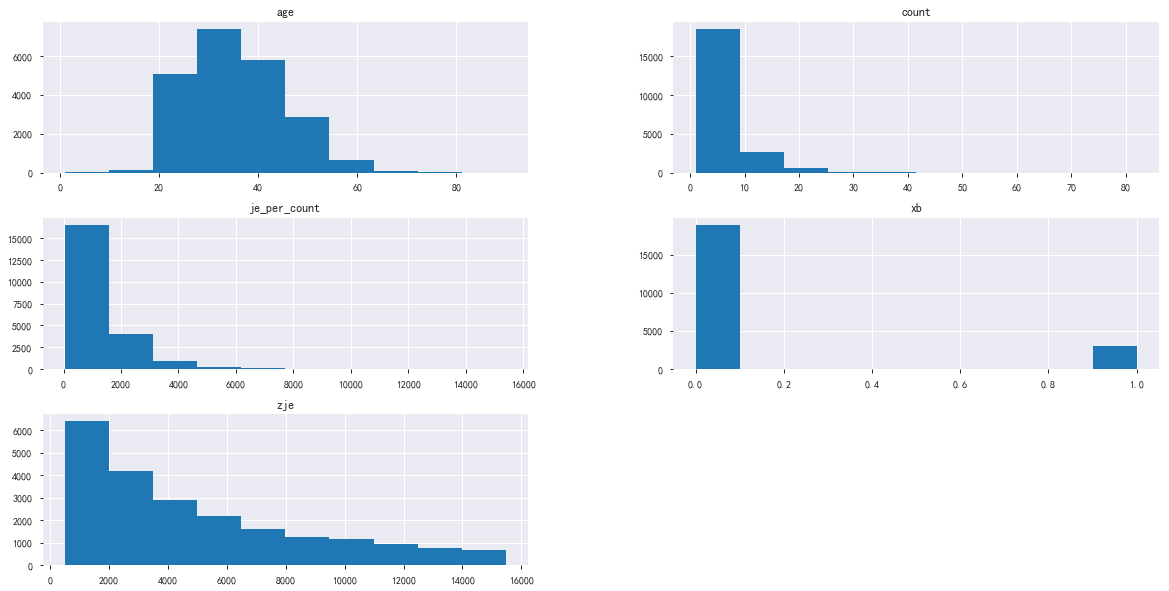

In [14]:
#groupby_1and3_postive.loc[10000:,:].hist()
hist_ = groupby_1and3_postive.loc[10000:,:].hist(bins=10,figsize=(20,10))

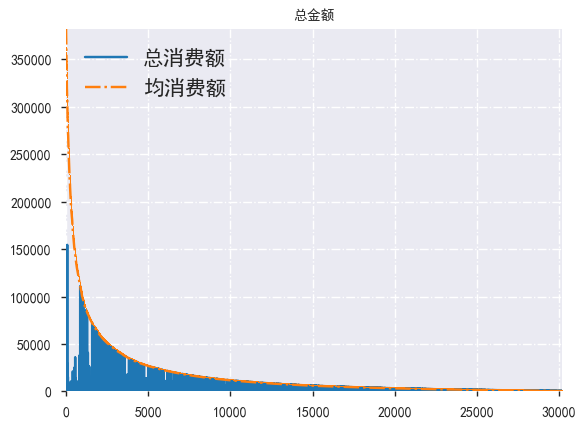

In [15]:
plot_line(groupby_1and3_postive.loc[100:,:],columns_=['je_per_count','zje'],legend_=['总消费额','均消费额'],title_='总金额')

In [16]:
#raw_data_sale_detail_vip[raw_data_sale_detail_vip['kh']=='7ff6682d']

In [17]:
describe_vip = groupby_1and3_postive.describe()[['age','xb']].T

In [18]:
print(f"有效会员的平均年龄为:{describe_vip.loc['age','mean'].round(0)}")
print(f"有效会员的女性占比为:{((1-describe_vip.loc['xb','mean'])*100).round(2)}%")

有效会员的平均年龄为:36.0
有效会员的女性占比为:85.94%


plot_line(raw_data_sale_flow_je_m,['je'])